In [1]:
#!pip install texttable
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from texttable import Texttable
import collections
from operator import itemgetter

def isNaN(num):
    return num != num

In [63]:
# read values from excel database
xlsx_path = 'tweets_database_1500.xlsx'
data = pd.read_excel(xlsx_path, 
                  names=['HASHTAG', 'OTHER HASHTAGS', "Twitter ID", "tweet message", "retweet","location", "followers"])
#data

Project section 4

In [64]:
G = nx.Graph()
hashtag = data['HASHTAG'].tolist()
other_hashtags = data['OTHER HASHTAGS'].tolist()

for i in range(len(hashtag)):
    tag = hashtag[i]
    if(tag not in  list(G.nodes())):
        G.add_node(tag, color= "red")
    other_tags = other_hashtags[i]
    if(isNaN(other_tags)):
        continue
    other_tags = other_tags.split(",")
    last_tag = other_tags[0]
    for other_tag in other_tags:
        if(other_tag not in list(G.nodes())):
            if(other_tag in hashtag):
                G.add_node(other_tag, color= "red")
            else:
                G.add_node(other_tag, color= "blue")
        if(tag != other_tag):
            G.add_edge(tag,other_tag)            
        if(last_tag != other_tag ):
            G.add_edge(last_tag,other_tag)
        last_tag = other_tag
       

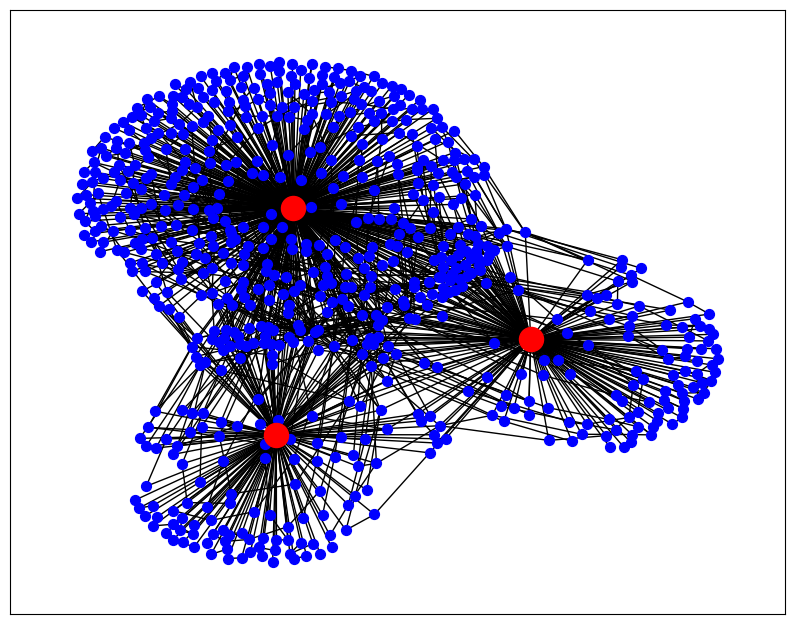

In [65]:
# find nodes with largest degree
node_and_degree = G.degree()
nodes = sorted(node_and_degree, key=itemgetter(1))
nodes.reverse() 
nodes = nodes[0:3]
largest_hubs = [u[0] for u in nodes]
colors = [u[1] for u in G.nodes(data="color")]
figure(figsize=(10, 8), dpi=100)
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos,
                 with_labels =False,
                 node_size=50,
                node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=largest_hubs, node_size=300, node_color='r')
plt.show()

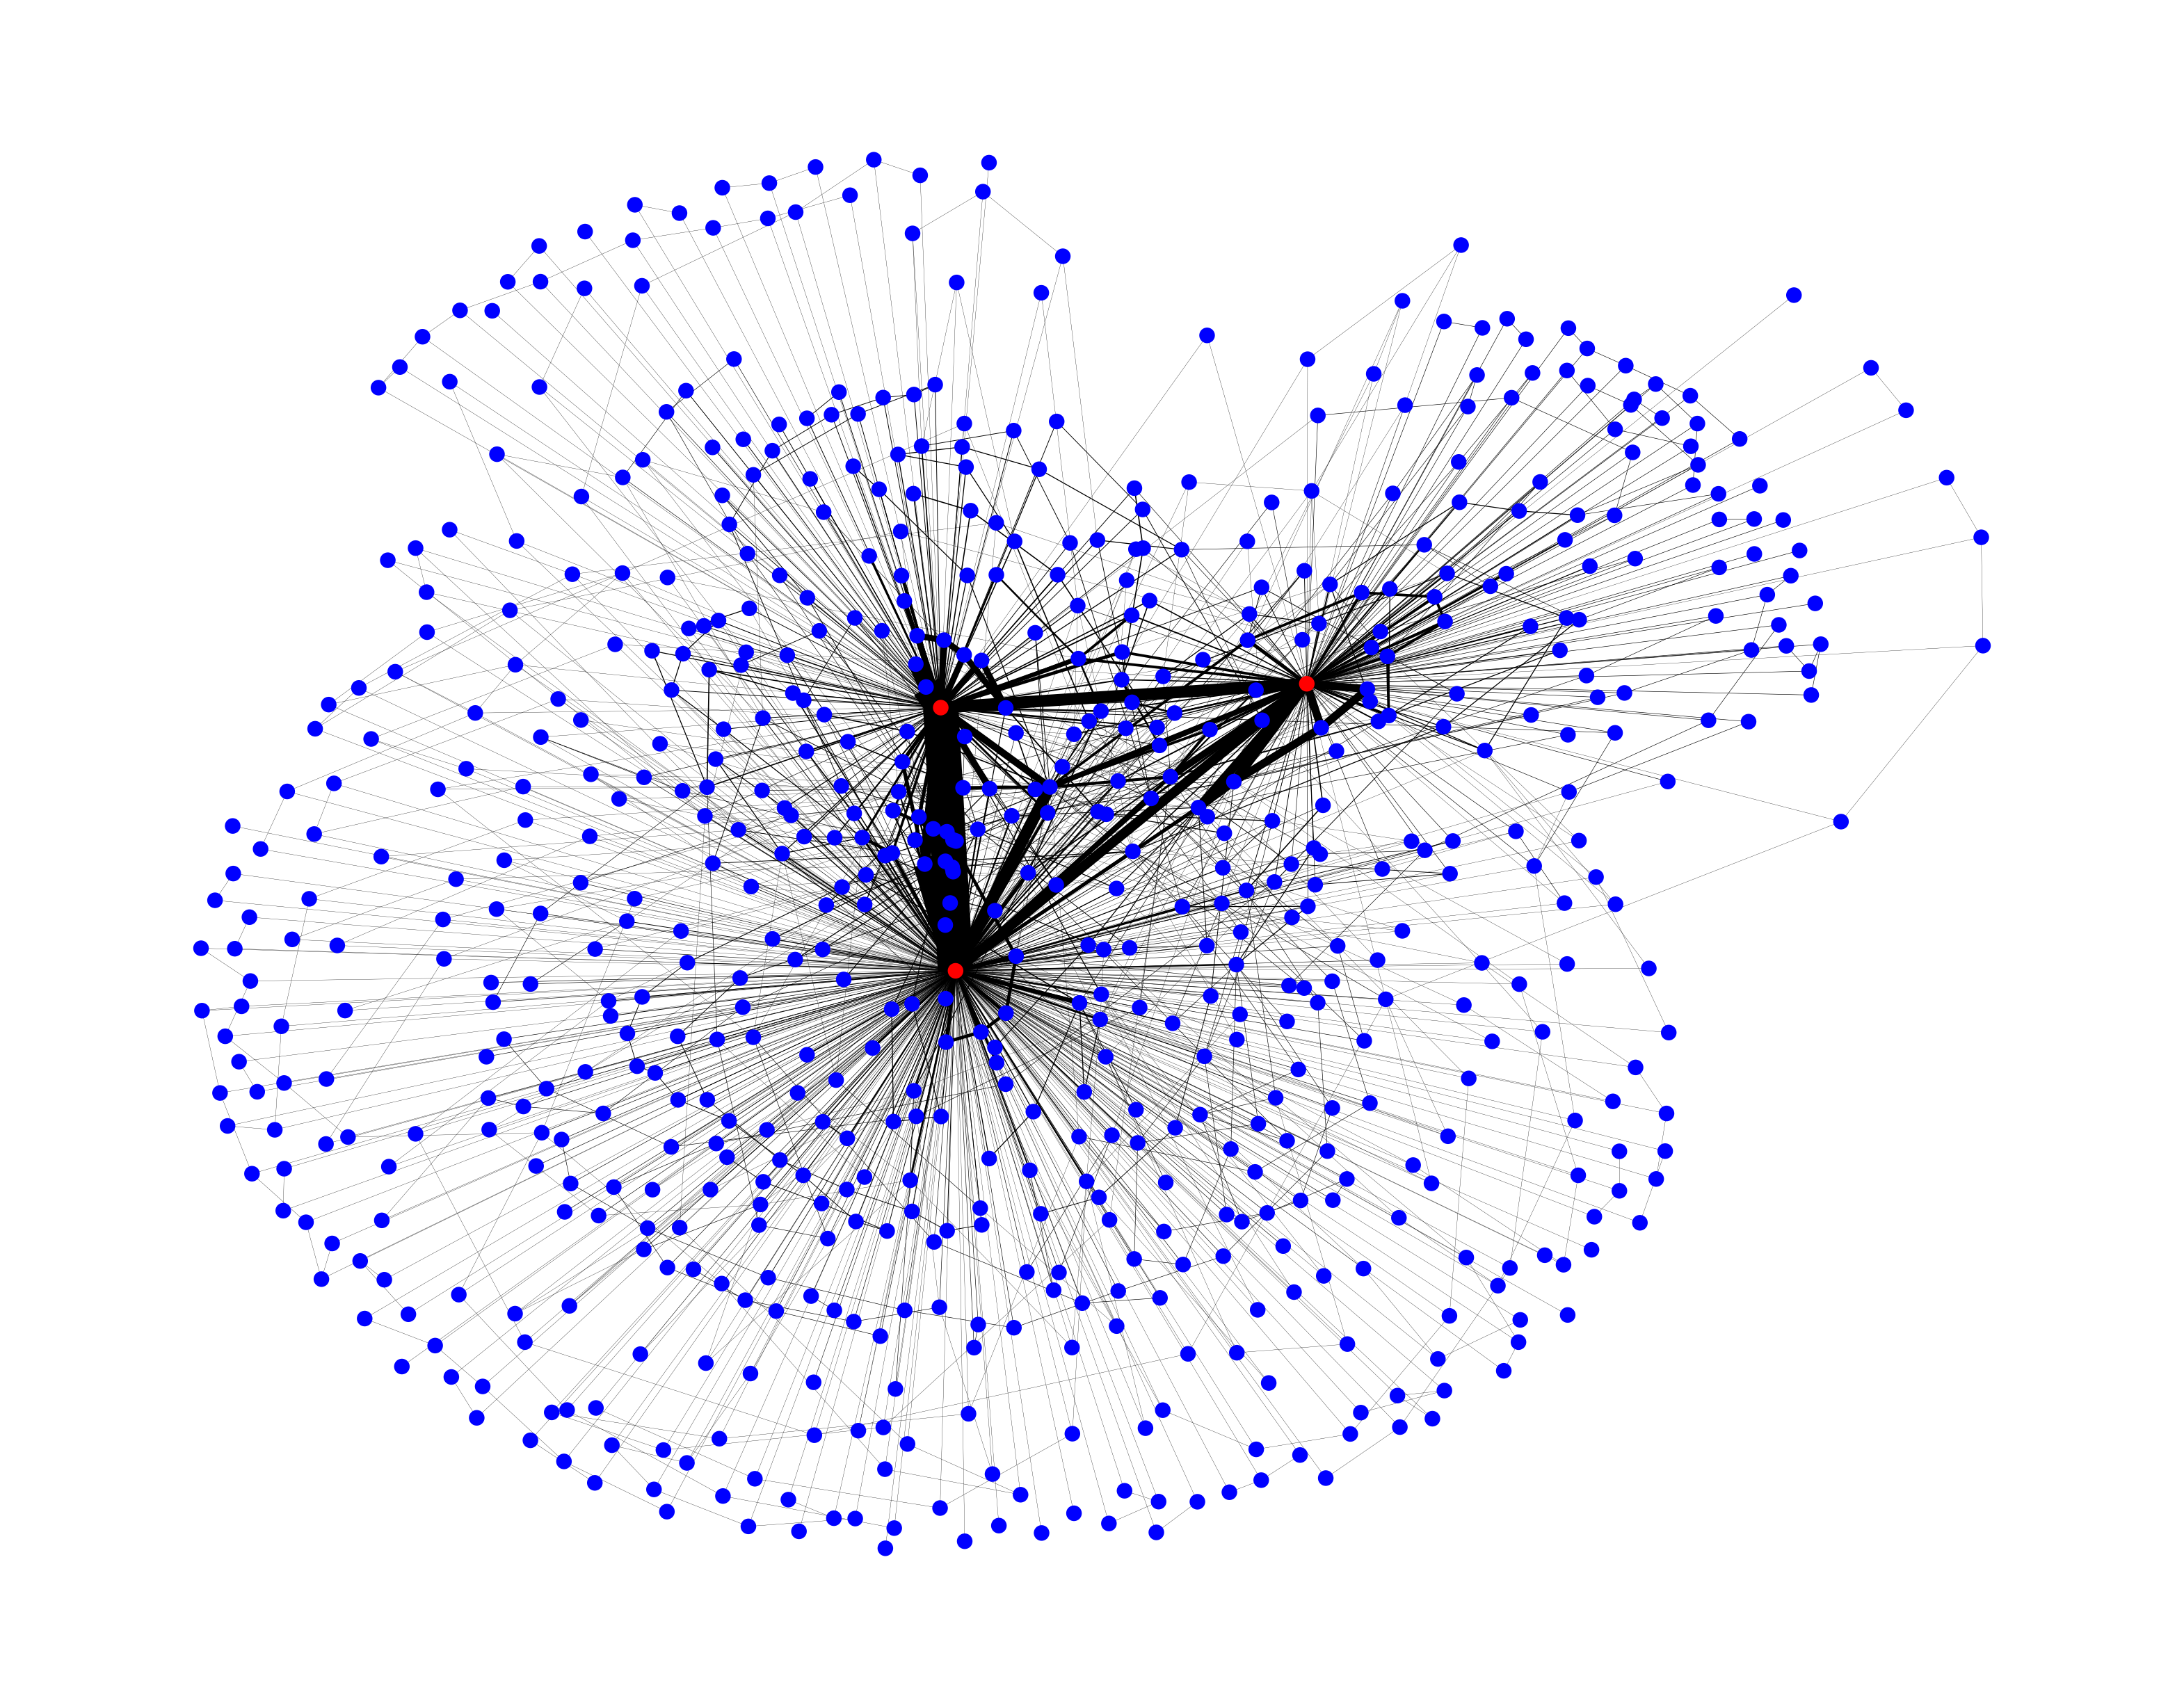

In [61]:
G_weighted = nx.Graph()
weight = 0
for i in range(len(hashtag)):
    tag = hashtag[i]
    if(tag not in  list(G_weighted.nodes())):
        G_weighted.add_node(tag, color= "red")
    other_tags = other_hashtags[i]
    if(isNaN(other_tags)):
        continue
    other_tags = other_tags.split(",")
    last_tag = other_tags[0]
    for other_tag in other_tags:
        if(other_tag not in list(G_weighted.nodes())):
            if(other_tag in hashtag):
                G_weighted.add_node(other_tag, color= "red")
            else:
                G_weighted.add_node(other_tag, color= "blue")
        if(tag != other_tag):
            try:
                weight = 1 + G_weighted[tag][other_tag]["weight"]
            except:
                weight = 1
            G_weighted.add_edge(tag,other_tag,weight=weight)
        if(last_tag != other_tag ):
            try:
                weight = 1 + G_weighted[last_tag][other_tag]["weight"]
            except:
                weight = 1
            G_weighted.add_edge(last_tag,other_tag,weight=weight)
        last_tag = other_tag
        
all_weights = []
for (node1,node2,data) in G_weighted.edges(data=True):
    all_weights.append(data['weight'])
    
unique_weights = list(set(all_weights))
node_list = list(G_weighted.nodes())
colors = [u[1] for u in G_weighted.nodes(data="color")]

pos = nx.spring_layout(G_weighted)
figure(figsize=(20, 16), dpi=200)
nx.draw_networkx_nodes(G,pos,node_color=colors,node_size=50)
for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G_weighted.edges(data=True) if edge_attr['weight']==weight]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = weight*len(node_list)/sum(all_weights)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)
        
plt.axis('off') 
plt.show()

Project section 5

In [66]:
N,K= G.order(), G.size()
avg_deg = float(K)/N
cent = np.array([x for x in nx.degree_centrality(G).values()])
avg_deg_cent = sum(cent)/len(cent)
adc_variance = sum((cent -avg_deg_cent)**2)/len(cent)
diameter = nx.diameter(G) 
clustering = nx.clustering(G)
clustering_avg = sum(clustering.values())/len(clustering)
largest = max([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])


#print( "Nodes: ", N)
#print( "Edges: ", K )
#print( "Average degree: ", round(avg_deg,4)) 
#print("Avarage  degree centrality: ", round(avg_deg_cent,4))
#print("Avarage degree centrality variance: " ,round(adc_variance,4))
#print("Graph diameter: ", diameter)
#print("The clustering coefficient for nodes: ", clustering)
#print("The size of largest component: ", largest)
theTable = Texttable()
dictlist = [["Hashtag", "Coefficient"]]
for key, value in clustering.items():
    temp = [key,value]
    dictlist.append(temp)
theTable.add_rows(dictlist)

rows = [["Properties", "Value"],["Nodes",N], ["Edges",K], ["Average degree",round(avg_deg,4)],["Avarage  degree centrality",round(avg_deg_cent,4)],
       ["Avarage degree centrality variance",round(adc_variance,4)], ["Graph diameter",diameter],
       ["Avarage clustering coefficient", round(clustering_avg,4)], ["The size of largest component",largest]]
table = Texttable()
table.add_rows(rows)
print(table.draw())
#print(theTable.draw())

df1 = pd.DataFrame(rows)
df1.to_excel("Properties.xlsx") 
df2 = pd.DataFrame(dictlist)
df2.to_excel("clustering_coefficient.xlsx")

+------------------------------------+-------+
|             Properties             | Value |
+====================================+=======+
| Nodes                              | 696   |
+------------------------------------+-------+
| Edges                              | 1587  |
+------------------------------------+-------+
| Average degree                     | 2.280 |
+------------------------------------+-------+
| Avarage  degree centrality         | 0.007 |
+------------------------------------+-------+
| Avarage degree centrality variance | 0.001 |
+------------------------------------+-------+
| Graph diameter                     | 3     |
+------------------------------------+-------+
| Avarage clustering coefficient     | 0.699 |
+------------------------------------+-------+
| The size of largest component      | 696   |
+------------------------------------+-------+


Project section 6 1/2

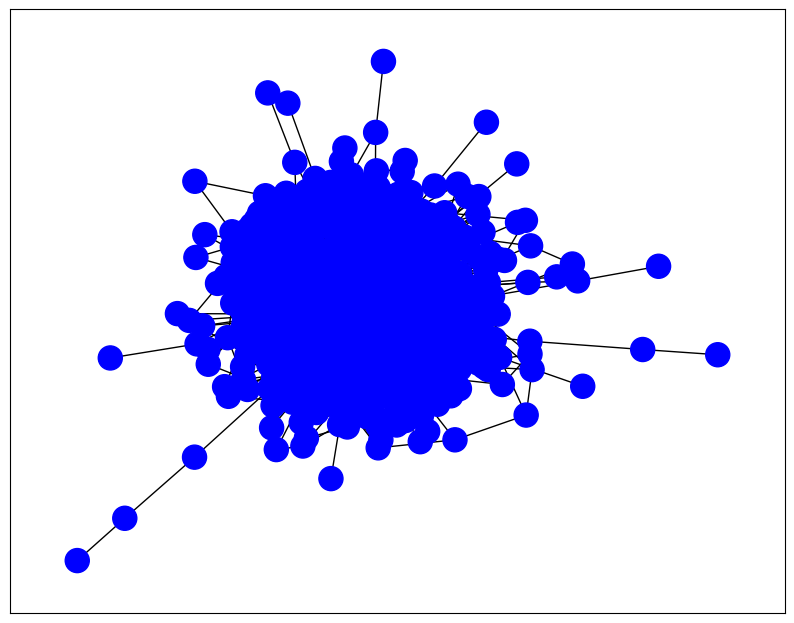

Avarage clustering coefficient:  0.4289


In [6]:
G_small = nx.random_reference(G,niter=2)
colors_small = [u[1] for u in G_small.nodes(data="color")]
clustering_small = nx.clustering(G_small)
clustering_small_avg = sum(clustering_small.values())/len(clustering_small)
figure(figsize=(10, 8), dpi=100)
nx.draw_networkx(G_small,
                 with_labels =False,
                node_color=colors_small)
plt.show()
print("Avarage clustering coefficient: ", round(clustering_small_avg,4))

Section 6 2/2 -> this one better?

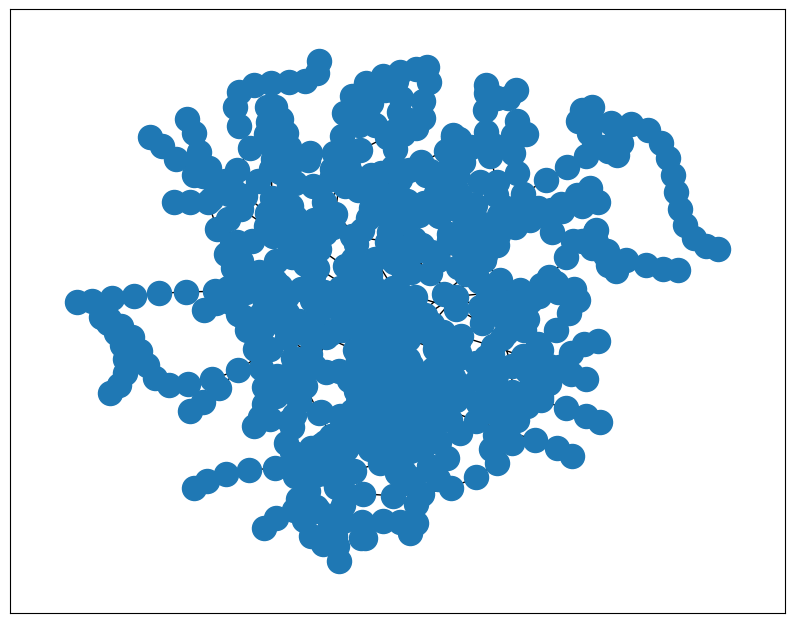

Avarage clustering coefficient:  0.0


In [7]:
G_watts = nx.watts_strogatz_graph(n=N, k=int(avg_deg), p=0.1)
clustering_watts = nx.average_clustering(G_watts)
figure(figsize=(10, 8), dpi=100)
nx.draw_networkx(G_watts,with_labels =False)
plt.show()
print("Avarage clustering coefficient: ", round(clustering_watts,4))

Section 7

In [9]:
# top 5 degree centralities
print("degree centrality", sorted(G.degree, key=lambda x: x[1], reverse=True)[:5])

# top 5 pagerank centralities
pageranks = nx.pagerank(G, max_iter=10000)
print("pagerank centrality", sorted(pageranks, key=pageranks.get, reverse=True)[:5])

# top 5 closeness centralities
closeness_centralities = nx.closeness_centrality(G)
print("closeness centrality", sorted(closeness_centralities, key=closeness_centralities.get, reverse=True)[:5])

# top 5 betweenness centralities
betweenness_centralities = nx.betweenness_centrality(G)
print("betweenness centrality", sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)[:5])

degree centrality [('#quitsmoking', 486), ('#stopsmoking', 193), ('#smokefree', 167), ('#vaping', 37), ('#vape', 26)]
pagerank centrality ['#quitsmoking', '#stopsmoking', '#smokefree', '#vaping', '#vape']
closeness centrality ['#quitsmoking', '#stopsmoking', '#smokefree', '#vaping', '#vape']
betweenness centrality ['#quitsmoking', '#stopsmoking', '#smokefree', '#vaping', '#vape']


In [79]:
# top 5 Katz's centrality ***Hard to compute
alpha =  1/max(nx.adjacency_spectrum(G))
katz_centrality = nx.katz_centrality(G, alpha=alpha, max_iter=200000,tol=0.2)
print("Katz centrality", sorted(katz_centrality,key=katz_centrality.get, reverse=True)[:5])

Katz centrality ['#quitsmoking', '#stopsmoking', '#smokefree', '#vaping', '#vape']


Section 8

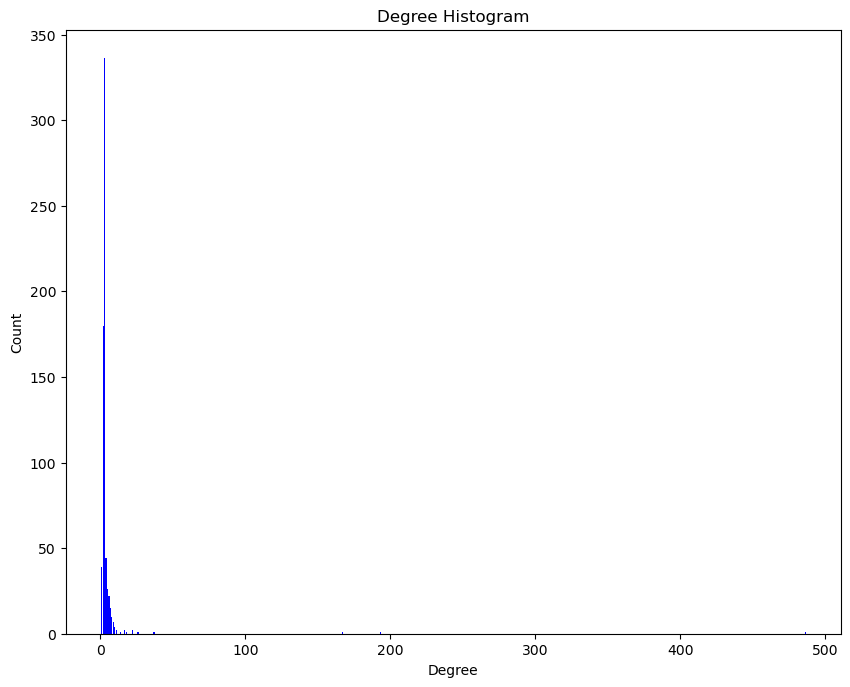

In [12]:
# degree distribution histogram
# example from https://networkx.org/documentation/networkx-2.3/auto_examples/drawing/plot_degree_histogram.html
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

figure(figsize=(10, 8), dpi=100)
plt.bar(deg, cnt, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
pos = nx.spring_layout(G)
plt.axis('off')
plt.show()

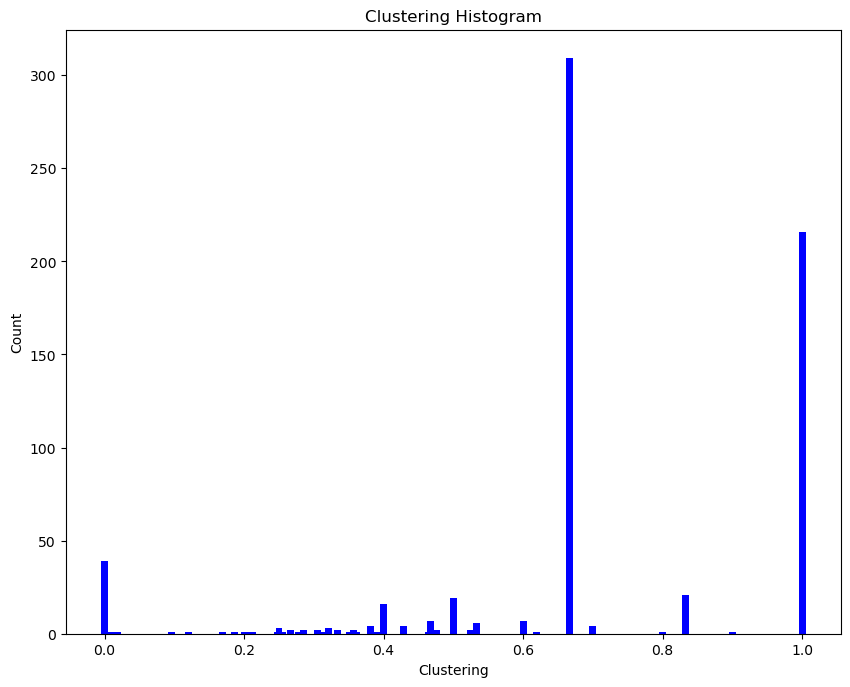

In [13]:
# local clustering coefficients histogram
clusterings = dict(nx.clustering(G))
degree_sequence = sorted([clusterings[hashtag] for hashtag in clusterings], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

figure(figsize=(10, 8), dpi=100)
plt.bar(deg, cnt, color='b', width=0.01)

plt.title("Clustering Histogram")
plt.ylabel("Count")
plt.xlabel("Clustering")

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
pos = nx.spring_layout(G)
plt.axis('off')
plt.show()


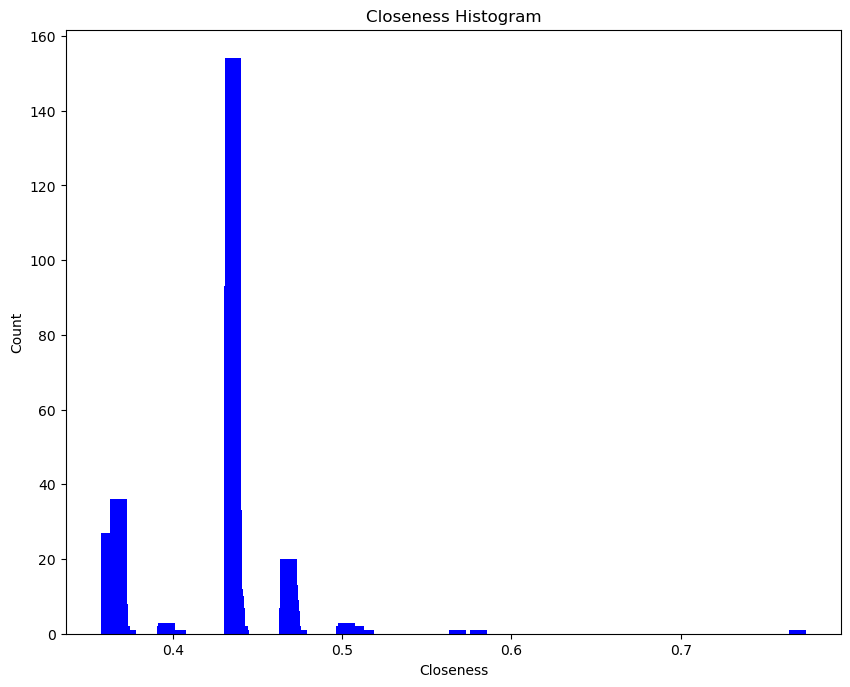

In [14]:
# local betweenness histogram
closenessness = dict(nx.closeness_centrality(G))
degree_sequence = sorted([closenessness[hashtag] for hashtag in closenessness], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

figure(figsize=(10, 8), dpi=100)
plt.bar(deg, cnt, width=0.01, color='b')

plt.title("Closeness Histogram")
plt.ylabel("Count")
plt.xlabel("Closeness")

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
pos = nx.spring_layout(G)
plt.axis('off')
plt.show()

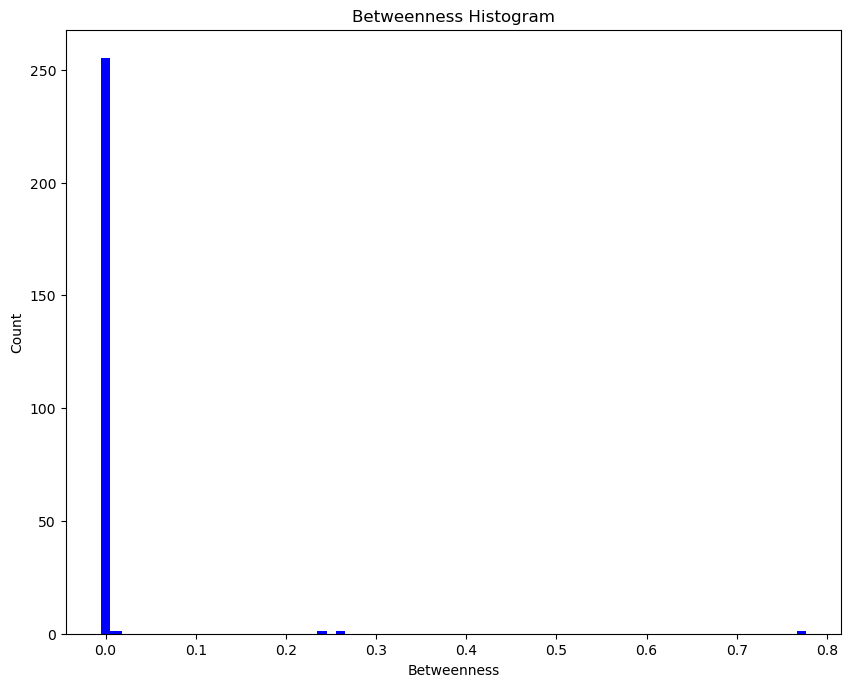

In [15]:
# betweenness histogram
betweennessness = dict(nx.betweenness_centrality(G))
degree_sequence = sorted([betweennessness[hashtag] for hashtag in betweennessness], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

figure(figsize=(10, 8), dpi=100)
plt.bar(deg, cnt, width=0.01, color='b')

plt.title("Betweenness Histogram")
plt.ylabel("Count")
plt.xlabel("Betweenness")

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
pos = nx.spring_layout(G)
plt.axis('off')
plt.show()

Section 9

In [16]:
# top 10 degree centralities
top_hashtag_values = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]
top_hashtags = [tuple_value[0] for tuple_value in top_hashtag_values]
print(top_hashtags, data.HASHTAG.value_counts())
i = 0
for index, hashtag in enumerate(data.HASHTAG.values):
    if hashtag in top_hashtags:
        i += 1
        print(index, hashtag, i)


['#quitsmoking', '#stopsmoking', '#smokefree', '#vaping', '#vape', '#health', '#smoking', '#nicotine', '#nosmoking', '#tobaccofree'] #quitsmoking    654
#stopsmoking    489
#smokefree      228
Name: HASHTAG, dtype: int64
0 #stopsmoking 1
1 #stopsmoking 2
2 #stopsmoking 3
3 #stopsmoking 4
4 #stopsmoking 5
5 #stopsmoking 6
6 #stopsmoking 7
7 #stopsmoking 8
8 #stopsmoking 9
9 #stopsmoking 10
10 #stopsmoking 11
11 #stopsmoking 12
12 #stopsmoking 13
13 #stopsmoking 14
14 #stopsmoking 15
15 #stopsmoking 16
16 #stopsmoking 17
17 #stopsmoking 18
18 #stopsmoking 19
19 #stopsmoking 20
20 #stopsmoking 21
21 #stopsmoking 22
22 #stopsmoking 23
23 #stopsmoking 24
24 #stopsmoking 25
25 #stopsmoking 26
26 #stopsmoking 27
27 #stopsmoking 28
28 #stopsmoking 29
29 #stopsmoking 30
30 #stopsmoking 31
31 #stopsmoking 32
32 #stopsmoking 33
33 #stopsmoking 34
34 #stopsmoking 35
35 #stopsmoking 36
36 #stopsmoking 37
37 #stopsmoking 38
38 #stopsmoking 39
39 #stopsmoking 40
40 #stopsmoking 41
41 #stopsmoking 42


723 #quitsmoking 724
724 #quitsmoking 725
725 #quitsmoking 726
726 #quitsmoking 727
727 #quitsmoking 728
728 #quitsmoking 729
729 #quitsmoking 730
730 #quitsmoking 731
731 #quitsmoking 732
732 #quitsmoking 733
733 #quitsmoking 734
734 #quitsmoking 735
735 #quitsmoking 736
736 #quitsmoking 737
737 #quitsmoking 738
738 #quitsmoking 739
739 #quitsmoking 740
740 #quitsmoking 741
741 #quitsmoking 742
742 #quitsmoking 743
743 #quitsmoking 744
744 #quitsmoking 745
745 #quitsmoking 746
746 #quitsmoking 747
747 #quitsmoking 748
748 #quitsmoking 749
749 #quitsmoking 750
750 #quitsmoking 751
751 #quitsmoking 752
752 #quitsmoking 753
753 #quitsmoking 754
754 #quitsmoking 755
755 #quitsmoking 756
756 #quitsmoking 757
757 #quitsmoking 758
758 #quitsmoking 759
759 #quitsmoking 760
760 #quitsmoking 761
761 #quitsmoking 762
762 #quitsmoking 763
763 #quitsmoking 764
764 #quitsmoking 765
765 #quitsmoking 766
766 #quitsmoking 767
767 #quitsmoking 768
768 #quitsmoking 769
769 #quitsmoking 770
770 #quitsmok